In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # генерирует поле 
import seaborn as sns #генерирует карту
from sklearn.ensemble import RandomForestRegressor

df=pd.read_excel('/Users/evgeniapolezaeva/Desktop/HW/ITMO/Fund/ID_data_mass_18122012.xlsx', sheet_name ='VU', skiprows=1).drop([0]) # чтение файла Excel в Python 
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 1'])
#print(df)


/Users/evgeniapolezaeva/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [16]:
k1 = df.columns[-2]
k2 = df.columns[-1]

df[k1][df[k1].isna()] = (df[k2][~df[k2].isna()]) * 1000
df=df.drop(columns=['Pсб.1', 'КГФ.1'])
df.head()

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
1,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,...,45.25,56.5,-,93.6,0.806017,801,1000,0.669449,2.782623,311.9094
2,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,...,45.25,56.5,-,92.9,0.806017,801,1000,0.669449,3.697781,288.6003
3,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,...,45.25,56.5,-,91.4,0.806017,801,1000,0.669449,4.515073,248.7906
4,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,...,45.25,56.5,-,89.2,0.806017,801,1000,0.669449,5.217673,223.5591
5,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,...,45.25,56.5,-,89.7,0.806017,801,1000,0.669449,5.765092,215.1486


In [17]:
df = df.loc[~df["G_total"].isna() | ~df["КГФ"].isna()]

# удаление старого индекса (было 167, некоторых из которых нет)
df = df.reset_index()

# создание нового (теперь от 0 до 93 по порядку)
df = df.drop(columns=["index"])

df
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
 #   print(df)

,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,53,31.7,...,45.25,56.5,-,93.6,0.806017,801,1000,0.669449,2.782623,311.9094
1,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,58.8,37.6,...,45.25,56.5,-,92.9,0.806017,801,1000,0.669449,3.697781,288.6003
2,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,63.6,42.8,...,45.25,56.5,-,91.4,0.806017,801,1000,0.669449,4.515073,248.7906
3,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,64.7,46.2,...,45.25,56.5,-,89.2,0.806017,801,1000,0.669449,5.217673,223.5591
4,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,64,49.4,...,45.25,56.5,-,89.7,0.806017,801,1000,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3284,12.7,215,307.8,98.6,215,308.1,97.2,65,45.8,...,35.28,40.5,41.6,94.4,NaN,782,NaN,0.66,NaN,153.0
89,3284,14.29,198,293.6,98.5,197,293.9,98.4,66.9,49.8,...,35.28,40.5,41.6,94,NaN,782,NaN,0.66,NaN,147.0
90,3288.6,7.94,231.229167,309.1,92.6,230,307.1,92.7,51,-,...,33.21,-,-,89.9,NaN,779.6,NaN,0.668,NaN,182.0
91,3288.6,11.11,217.201681,293.9,93.1,215,293.9,93.3,60,-,...,33.21,-,-,90.8,NaN,779.6,NaN,0.668,NaN,145.0


In [18]:
df = df.replace('-', np.NaN)
df['Глубина манометра'] = df['Глубина манометра'].replace('не спускался', np.NaN)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

    Глубина манометра    Dшт        Руст        Рзаб        Pлин      Руст.1  \
0              3576.3   7.94  249.600000  370.100000  101.800000  249.000000   
1              3576.3   9.53  233.500000  364.600000  101.300000  231.000000   
2              3576.3  11.11  213.400000  357.100000  101.600000  211.000000   
3              3576.3  12.70  191.600000  347.400000   98.400000  187.000000   
4              3576.3  14.29  171.900000  337.700000   99.200000  169.000000   
5              3576.3   9.53  199.500000  286.400000  106.361669  199.500000   
6              3667.0   7.94  252.000000  354.333525  102.932004  252.000000   
7              3667.0   9.53  250.000000  350.200000  103.186902  250.000000   
8              3667.0  11.11  240.000000  344.000000  105.671499  240.000000   
9              3667.0  12.70  228.000000  336.700000  108.100063  228.000000   
10             3579.0   7.94  259.608696  365.860000  103.471415  259.000000   
11             3579.0   9.53  239.423077

In [5]:
df.columns

Index(['Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин', 'Руст.1', 'Рзаб.1',
       'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин', 'Дебит газа',
       'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси', 'Дебит гааз',
       'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Ro_g', 'Ro_c', 'Ro_w',
       'Удельная плотность газа ', 'G_total', 'КГФ'],
      dtype='object')

In [19]:
# Для каждого признака считаем элементы описательной статистики
rows_list = []
for column in df.columns:
    
    rows_list.append([column, len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].min(), df[column].mean(), df[column].max(), df[column].std(), df[column].nunique(), 
                                    df[column].quantile(0.25), df[column].quantile(0.5), df[column].quantile(0.75), df[column].quantile(0.25) - df[column].quantile(0.75)])
params = pd.DataFrame(rows_list, columns=['Признак', 'Количество', '% пропусков', 'Минимум', 'Среднее', 'Максимум', 'Стандартное отклонение', 
                                    'Мощность', 'Первый квартиль', 'Медиана', 'Третий квартиль', 'IQR'])
params

,Признак,Количество,% пропусков,Минимум,Среднее,Максимум,Стандартное отклонение,Мощность,Первый квартиль,Медиана,Третий квартиль,IQR
0,Глубина манометра,93,3.225806,3276.000000,3524.086667,3670.000000,144.474862,20,3427.625000,3579.000000,3652.250000,-224.625000
1,Dшт,93,0.000000,6.350000,10.951183,15.880000,2.423172,10,9.530000,11.110000,12.700000,-3.170000
2,Руст,93,0.000000,138.157895,228.293412,337.108108,41.897238,87,201.636750,229.894737,252.000000,-50.363250
3,Рзаб,93,3.225806,174.000000,331.762255,458.600000,56.481235,88,297.797500,337.789172,364.150000,-66.352500
4,Pлин,93,0.000000,73.306638,99.860962,121.682930,7.300663,91,95.945951,100.800000,103.865199,-7.919248
5,Руст.1,93,0.000000,136.000000,227.644269,333.000000,41.757127,73,200.000000,228.000000,252.000000,-52.000000
6,Рзаб.1,93,3.225806,174.000000,330.334444,458.500000,56.357493,89,294.625000,334.250000,362.150000,-67.525000
7,Рлин,93,0.000000,40.739839,98.005453,123.616800,12.425851,88,95.335032,100.260000,104.000000,-8.664968
8,Туст,93,0.000000,24.200000,56.172043,75.000000,11.250781,51,50.300000,58.000000,64.000000,-13.700000
9,Тна шлейфе,93,35.483871,14.000000,43.091667,110.200000,19.602337,57,33.300000,38.700000,46.375000,-13.075000


In [20]:
# признак Ro_w можно удалить, поскольку его процент пропусков выше 60%, а именно 75,...%
# соответственно, Ro_g тоже можно удалить
df = df.drop(columns=['Ro_g', 'Ro_w'])

df


,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,Туст,Тна шлейфе,...,Дебит воды.1,Нэф,Рпл. Тек (послед точка на КВД),Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Ro_c,Удельная плотность газа,G_total,КГФ
0,3576.3,7.94,249.600000,370.1,101.800000,249.0,359.6,101.800,53.0,31.7,...,0.4,56.8000,45.25,56.5,NaN,93.6,801.0,0.669449,2.782623,311.9094
1,3576.3,9.53,233.500000,364.6,101.300000,231.0,338.1,102.400,58.8,37.6,...,1.4,56.8000,45.25,56.5,NaN,92.9,801.0,0.669449,3.697781,288.6003
2,3576.3,11.11,213.400000,357.1,101.600000,211.0,314.8,100.600,63.6,42.8,...,1.9,56.8000,45.25,56.5,NaN,91.4,801.0,0.669449,4.515073,248.7906
3,3576.3,12.70,191.600000,347.4,98.400000,187.0,291.5,99.000,64.7,46.2,...,3.3,56.8000,45.25,56.5,NaN,89.2,801.0,0.669449,5.217673,223.5591
4,3576.3,14.29,171.900000,337.7,99.200000,169.0,270.3,99.500,64.0,49.4,...,4.7,56.8000,45.25,56.5,NaN,89.7,801.0,0.669449,5.765092,215.1486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,3284.0,12.70,215.000000,307.8,98.600000,215.0,308.1,97.200,65.0,45.8,...,4.8,44.5000,35.28,40.5,41.6,94.4,782.0,0.660000,NaN,153.0000
89,3284.0,14.29,198.000000,293.6,98.500000,197.0,293.9,98.400,66.9,49.8,...,6.5,44.5000,35.28,40.5,41.6,94.0,782.0,0.660000,NaN,147.0000
90,3288.6,7.94,231.229167,309.1,92.600000,230.0,307.1,92.700,51.0,NaN,...,0.4,48.3747,33.21,NaN,NaN,89.9,779.6,0.668000,NaN,182.0000
91,3288.6,11.11,217.201681,293.9,93.100000,215.0,293.9,93.300,60.0,NaN,...,1.6,48.3747,33.21,NaN,NaN,90.8,779.6,0.668000,NaN,145.0000


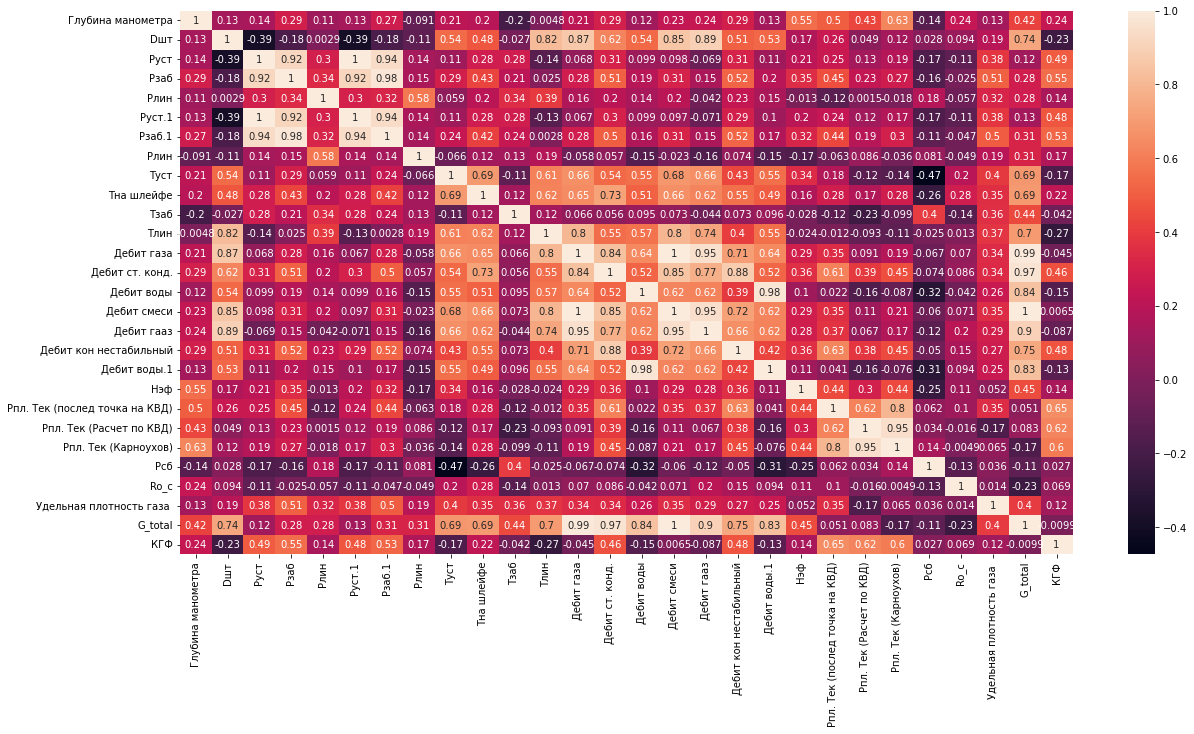

In [21]:
# тепловая карта - как признаки друг на друга влияют, как они связаны, чем выше значение - тем больше связь.
figure, axes = plt.subplots(figsize=(20,10))
# annot=True - отображение чисел
sns.heatmap(df.corr(), annot=True, ax=axes)
plt.show()

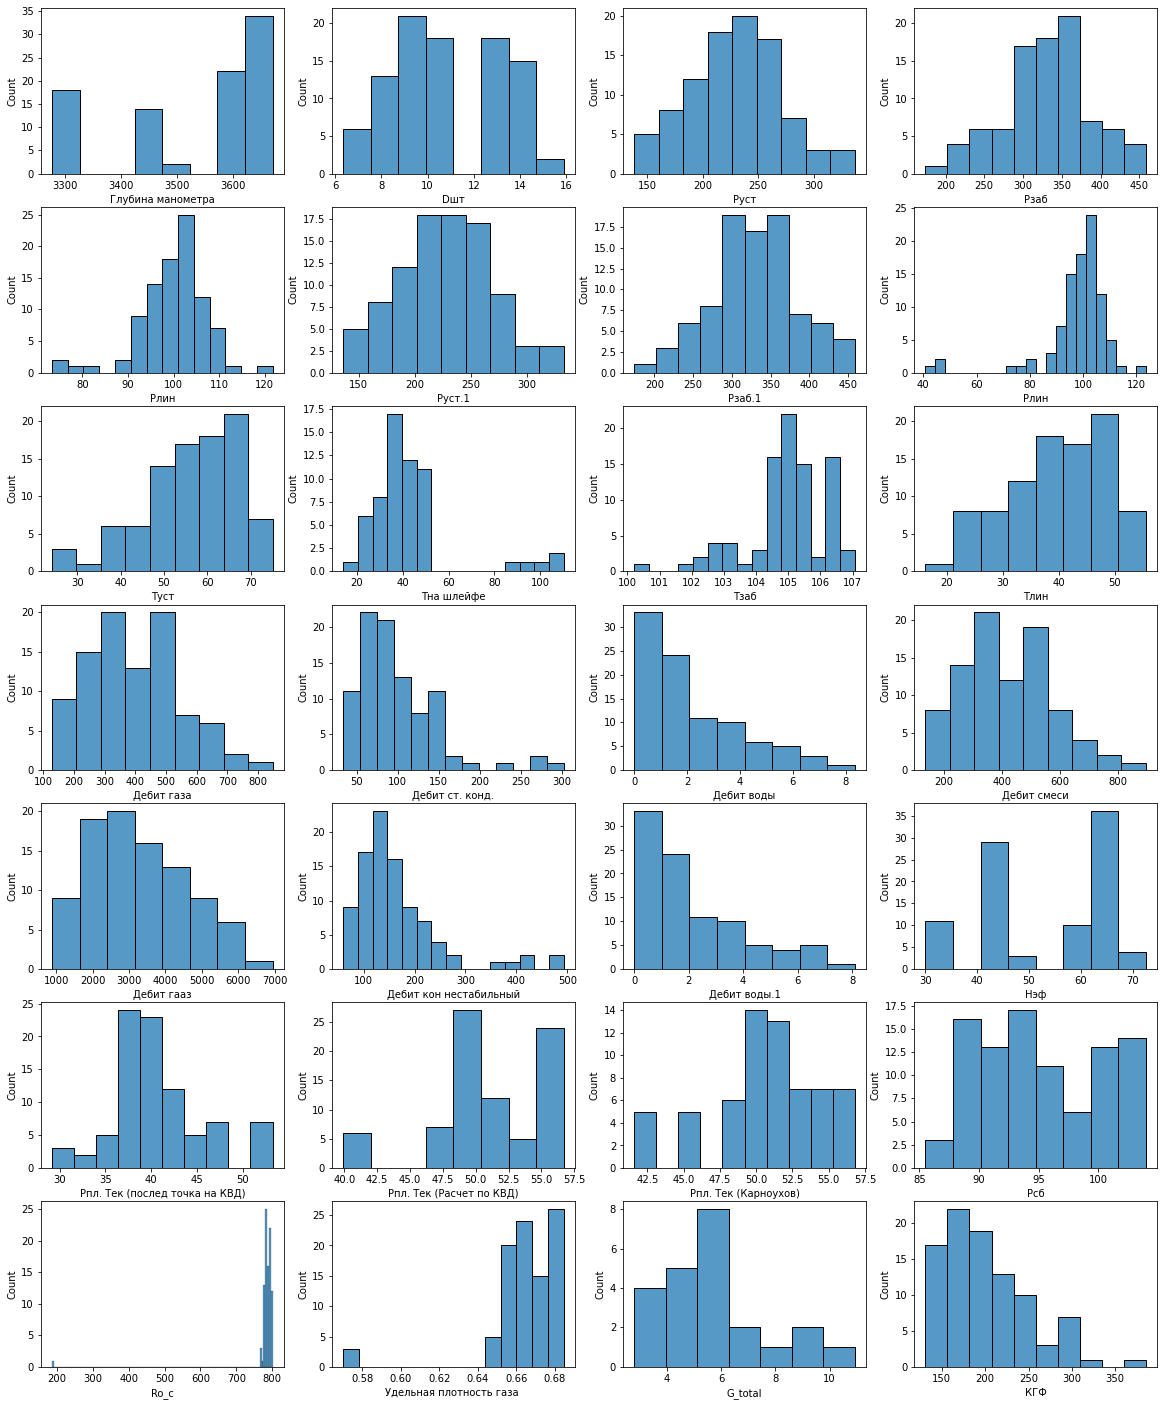

In [22]:
# графики распределения признаков главного dataframe 
figure, axes = plt.subplots(7, 4, figsize=(20,25))

i = 0 # столбцы
j = 0 # строки
for column in df.columns:
    if j == 4:
        j = 0
        i += 1
    sns.histplot(df[column], ax=axes[i, j])
    j += 1

/Users/evgeniapolezaeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/evgeniapolezaeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/evgeniapolezaeva/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

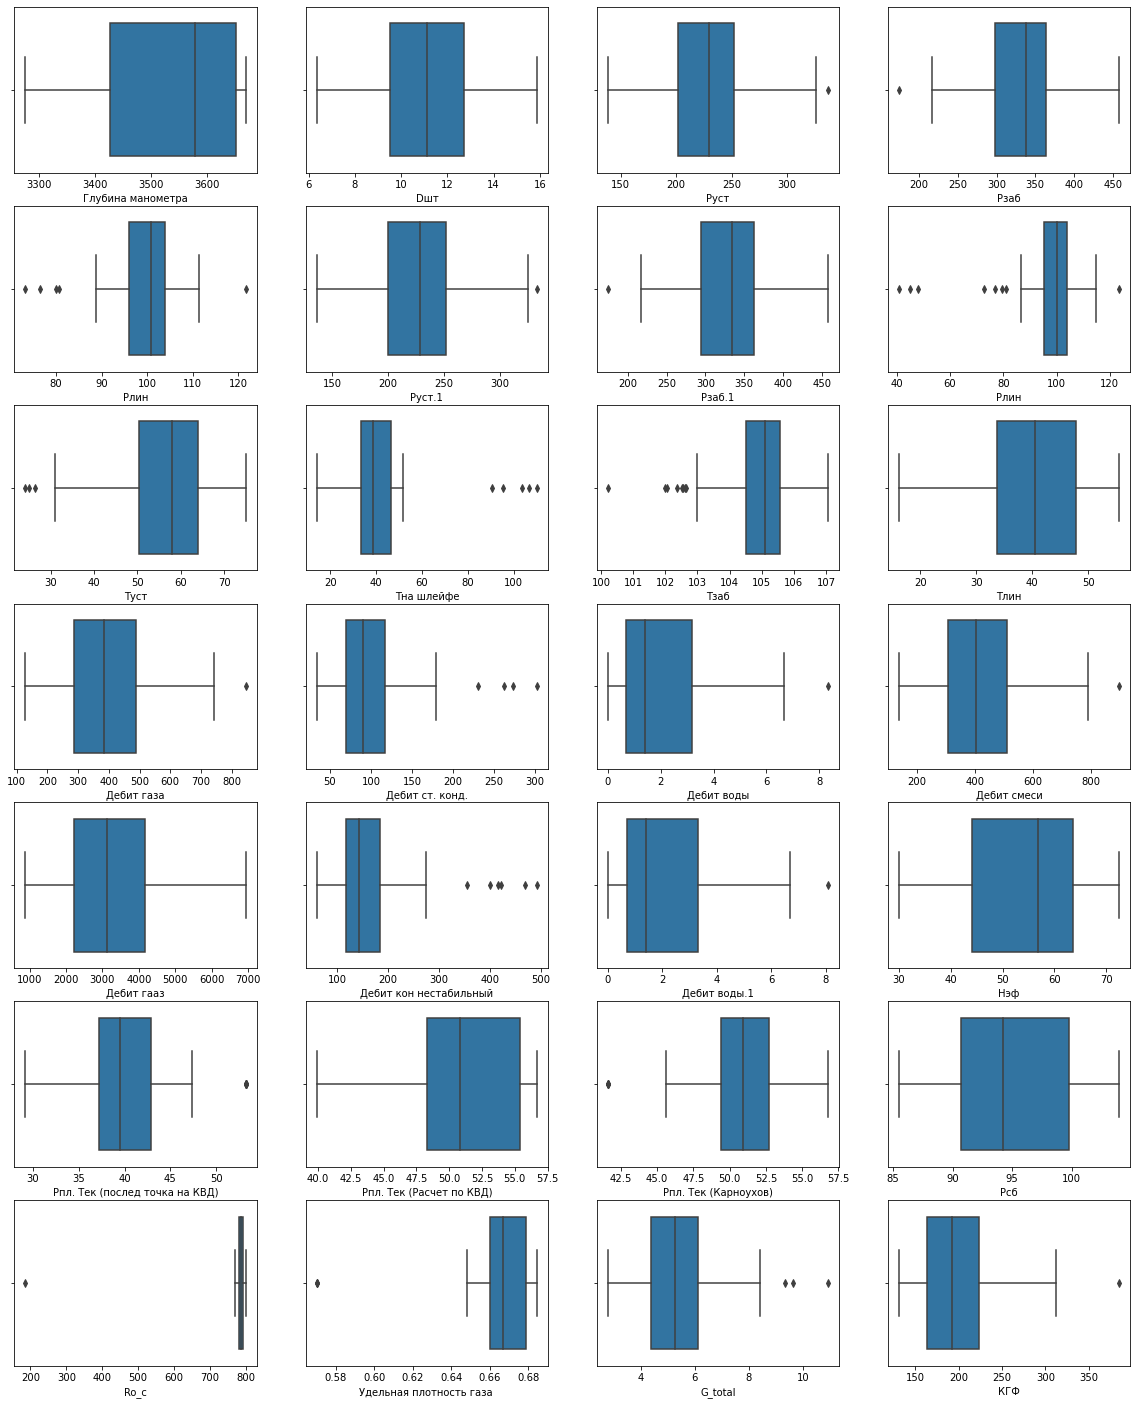

In [23]:
# диаграмма размаха (последние 4 столбца, где мы считали всякие значения) 
# нужны для того, чтобы смотреть на выбросы, есть или нет их, думать
figure, axes = plt.subplots(7, 4, figsize=(20,25))

i = 0 # столбцы
j = 0 # строки
for column in df.columns:
    if j == 4:
        j = 0
        i += 1
    sns.boxplot(df[column], ax=axes[i, j])
    j += 1

In [24]:
x = df[df.columns[:-2]].fillna(-100)
y = df[df.columns[-2:]].fillna(-100)

rfr = RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor()

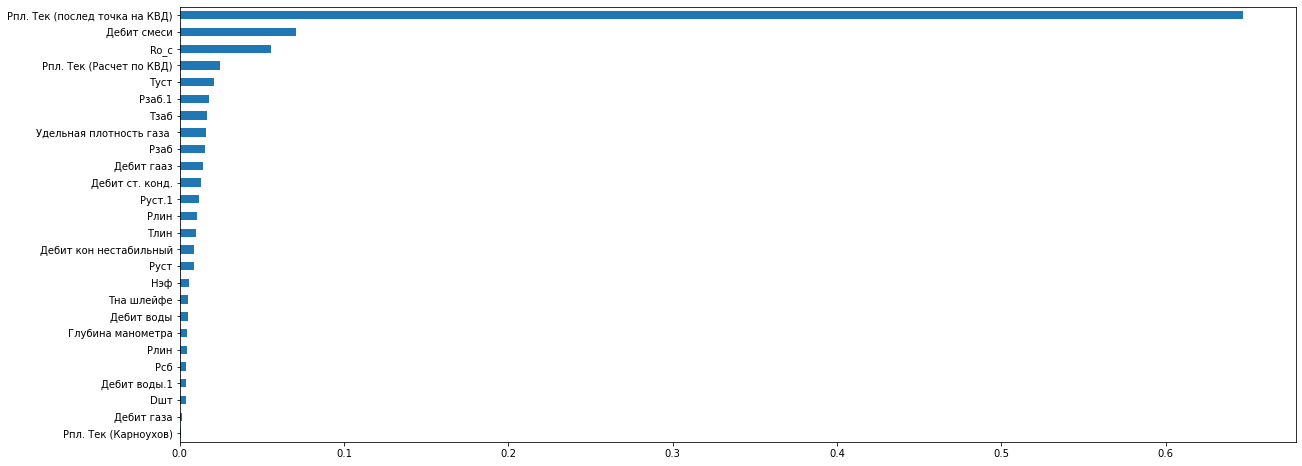

In [25]:
# Важность признаков 
# числовые значения важности каждого признака - rfr.feature_importances_
# берем все названия колонок - X.columns[0:len(X.columns)]

imp = pd.Series(rfr.feature_importances_, x.columns[0:len(x.columns)]).sort_values()
plt.figure(figsize=(20,8))
imp.plot(kind='barh')
plt.show()

In [ ]:
df = df.drop(columns=['Руст', 'Рзаб', 'Дебит смеси', 'Дебит воды.1', 'Рлин', 'Дебит газа', 
                      'Рпл. Тек (Карноухов)','Рпл. Тек (Расчет по КВД)', 'Рлин', 'Руст.1'
                     ])


